In [65]:
import numpy as np
import pandas as pd
from math import lgamma
from ast import literal_eval, parse
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.io import fits


#### Chaplin et al 2014: https://ui.adsabs.harvard.edu/abs/2014ApJS..210....1C/abstract

In [66]:
path = '/Users/chrislam/Desktop/sculpting/'
filename = path+'asteroseismology_data/chaplin/table4.dat.fits' # from Chaplin et al 2014
# table 4: Estimated stellar properties using SDSS-calibrated T_eff_ and field-average [Fe/H] values
# table 5: Estimated stellar properties using IRFM T_eff_ and field-average [Fe/H] values
hdul = fits.open(filename)
hdul.info()
#data = fits.getdata(filename,header=True,ext=1)

Filename: /Users/chrislam/Desktop/sculpting/asteroseismology_data/chaplin/table4.dat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   ()      
  1  table4.dat    1 TableHDU       146   518R x 16C   [I8, F4.2, F4.2, F4.2, F4.2, F4.2, F4.2, F6.4, F6.4, F6.4, F5.3, F5.3, F5.3, F4.1, F4.1, F3.1]   


In [67]:
data = fits.getdata(filename,header=True,ext=1)
df = pd.DataFrame(np.array(data[0])) # to avoid big-endian/little-endian mixup: https://stackoverflow.com/questions/30283836/creating-pandas-dataframe-from-numpy-array-leads-to-strange-errors
print(df.head())

           KIC     Mass   E_Mass   e_Mass      Rad    E_Rad    e_Rad  \
0  b' 1430163'  b'1.38'  b'0.14'  b'0.10'  b'1.49'  b'0.05'  b'0.05'   
1  b' 1435467'  b'1.16'  b'0.20'  b'0.06'  b'1.63'  b'0.08'  b'0.05'   
2  b' 1725815'  b'1.43'  b'0.15'  b'0.11'  b'2.02'  b'0.08'  b'0.08'   
3  b' 2010607'  b'1.37'  b'0.15'  b'0.14'  b'2.42'  b'0.12'  b'0.11'   
4  b' 2309595'  b'1.14'  b'0.19'  b'0.22'  b'2.40'  b'0.19'  b'0.23'   

         rho      E_rho      e_rho    log(g)  E_log(g)  e_log(g)      Age  \
0  b'0.4195'  b'0.0189'  b'0.0181'  b'4.234'  b'0.014'  b'0.015'  b' 1.3'   
1  b'0.2732'  b'0.0073'  b'0.0071'  b'4.088'  b'0.019'  b'0.014'  b' 4.7'   
2  b'0.1732'  b'0.0077'  b'0.0074'  b'3.982'  b'0.014'  b'0.014'  b' 3.1'   
3  b'0.0972'  b'0.0079'  b'0.0075'  b'3.809'  b'0.025'  b'0.025'  b' 3.8'   
4  b'0.0828'  b'0.0078'  b'0.0067'  b'3.734'  b'0.013'  b'0.013'  b' 6.0'   

     E_Age   e_Age  
0  b' 0.6'  b'0.7'  
1  b' 0.7'  b'1.7'  
2  b' 0.7'  b'0.8'  
3  b' 0.8'  b'0.8'  

In [68]:
def convert_float(x):
    try:
        return float(x)
    except Exception as e:
        return None
    
def convert_int(x):
    try:
        return int(x)
    except Exception as e:
        return None
    
df.KIC = df.KIC.apply(convert_int)
#df.KIC = df.KIC.str.decode("utf-8").astype("str")
df.Mass = df.Mass.apply(convert_float)
df.E_Mass = df.E_Mass.apply(convert_float)
df.e_Mass = df.e_Mass.apply(convert_float)
df.Rad = df.Rad.apply(convert_float)
df.E_Rad = df.E_Rad.apply(convert_float)
df.e_Rad = df.e_Rad.apply(convert_float)
df.rho = df.rho.apply(convert_float)
df.E_rho = df.E_rho.apply(convert_float)
df.e_rho = df.e_rho.apply(convert_float)
df['log(g)'] = df['log(g)'].apply(convert_float)
df['E_log(g)'] = df['E_log(g)'].apply(convert_float)
df['e_log(g)'] = df['e_log(g)'].apply(convert_float)
df.Age = df.Age.apply(convert_float)
df.E_Age = df.E_Age.apply(convert_float)
df.e_Age = df.e_Age.apply(convert_float)


In [69]:
chaplin = df
chaplin['mean_age_error'] = 0.5*(chaplin.E_Age + chaplin.e_Age)

Cross match against Gaia-Kepler crossmatch

In [70]:
catalog = pd.read_csv(path+'berger_kepler_stellar_fgk.csv')

/Users/chrislam/opt/anaconda3/envs/sculpting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (138) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [71]:
pnum = pd.read_csv(path+'pnum_plus_cands_fgk.csv')
pnum = pnum.drop_duplicates(['kepid'])
k = pnum.koi_count.value_counts() 

In [72]:
pd.merge(df, pnum, on='KIC')

,KIC,Mass,E_Mass,e_Mass,Rad,E_Rad,e_Rad,rho,E_rho,e_rho,...,feh_y,feh_err,RUWE,num_gaia_companions,Kmag_final_prov,evstate,logR,is_giant,fractional_err1,fractional_err2
0,3632418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.041,0.15,1.0761,0,NaN,NaN,0.300378,False,0.136719,-0.128906
1,4450844,1.13,0.10,0.10,1.59,0.06,0.06,0.2823,0.0085,0.0081,...,-0.136,0.15,0.9346,0,NaN,NaN,0.197832,False,0.204427,-0.252604
2,7296438,0.91,0.19,0.11,1.30,0.08,0.05,0.4155,0.0217,0.0212,...,0.268,0.15,1.1000,0,NaN,NaN,0.147058,False,0.408273,-0.275180
3,7429287,1.08,0.17,0.10,1.59,0.09,0.07,0.2710,0.0104,0.0103,...,-0.390,0.15,0.9286,0,NaN,NaN,0.196176,False,0.144915,-0.137288
4,8176564,1.19,0.11,0.12,1.55,0.05,0.06,0.3226,0.0118,0.0109,...,-0.126,0.15,0.9848,0,NaN,NaN,0.178977,False,0.306368,-0.309811
5,9394953,1.24,0.09,0.18,1.75,0.06,0.08,0.2269,0.0068,0.0068,...,0.060,0.15,0.8812,0,NaN,NaN,0.253822,False,0.433673,-0.211735
6,9414417,1.24,0.14,0.11,1.85,0.07,0.06,0.1949,0.0060,0.0058,...,-0.049,0.15,1.1269,0,NaN,NaN,0.282849,False,0.418868,-0.147170
7,9457728,1.21,0.18,0.08,1.85,0.09,0.05,0.1929,0.0063,0.0061,...,-0.161,0.15,0.9958,0,NaN,NaN,0.268344,False,0.337302,-0.158730
8,9579208,1.33,0.10,0.15,1.85,0.06,0.08,0.2085,0.0072,0.0069,...,-0.170,0.15,0.9527,0,NaN,NaN,0.251881,False,0.199153,-0.161017
9,9696358,1.37,0.17,0.13,2.10,0.09,0.08,0.1489,0.0081,0.0080,...,0.170,0.15,0.9864,0,NaN,NaN,0.335458,False,0.209756,-0.165854


In [73]:
np.nanmean(0.5*(df.E_Age + df.e_Age))

1.4908548707753482

In [74]:
np.nanmean(0.5*(pnum.iso_age_err1 + np.abs(pnum.iso_age_err2)))

1.7592390243902436

In [75]:
np.nanmean(0.5*(catalog.iso_age_err1 + np.abs(catalog.iso_age_err2)))

1.8026900415553573

In [76]:
df

,KIC,Mass,E_Mass,e_Mass,Rad,E_Rad,e_Rad,rho,E_rho,e_rho,log(g),E_log(g),e_log(g),Age,E_Age,e_Age,mean_age_error
0,1430163,1.38,0.14,0.10,1.49,0.05,0.05,0.4195,0.0189,0.0181,4.234,0.014,0.015,1.3,0.6,0.7,0.65
1,1435467,1.16,0.20,0.06,1.63,0.08,0.05,0.2732,0.0073,0.0071,4.088,0.019,0.014,4.7,0.7,1.7,1.20
2,1725815,1.43,0.15,0.11,2.02,0.08,0.08,0.1732,0.0077,0.0074,3.982,0.014,0.014,3.1,0.7,0.8,0.75
3,2010607,1.37,0.15,0.14,2.42,0.12,0.11,0.0972,0.0079,0.0075,3.809,0.025,0.025,3.8,0.8,0.8,0.80
4,2309595,1.14,0.19,0.22,2.40,0.19,0.23,0.0828,0.0078,0.0067,3.734,0.013,0.013,6.0,4.5,1.5,3.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,12352180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,12366681,1.42,0.28,0.12,2.60,0.13,0.09,0.0812,0.0025,0.0025,3.762,0.023,0.015,3.7,0.7,1.4,1.05
515,12507240,1.37,0.11,0.10,1.94,0.06,0.06,0.1892,0.0071,0.0071,4.001,0.015,0.015,3.9,0.8,0.8,0.80
516,12508433,1.17,0.09,0.12,2.20,0.07,0.09,0.1094,0.0038,0.0036,3.819,0.011,0.013,6.3,1.8,0.9,1.35


#### Serenelli et al 2017, aka APOKASC: https://ui.adsabs.harvard.edu/abs/2017ApJS..233...23S/abstract

Using table 4 because it has less systematic uncertainty than table 5.

In [77]:
filename = path+'asteroseismology_data/serenelli/J_ApJS_233_23_table4.dat.fits' # from Chaplin et al 2014
# table 4: Stellar fundamental parameters based on the SDSS Teff scale
# table 5: Stellar fundamental parameters based on the APOGEE Stellar Parameters and Chemical Abundances pipeline (ASPCAP) Teff scale
# table 4 is better
hdul = fits.open(filename)
hdul.info()

Filename: /Users/chrislam/Desktop/sculpting/asteroseismology_data/serenelli/J_ApJS_233_23_table4.dat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  table4.dat    1 TableHDU       209   415R x 25C   [I8, F8.3, F7.3, F6.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, E9.4, E9.4, E9.4, E9.4, F6.3, F5.3, F5.3, F5.3]   


In [78]:
data = fits.getdata(filename,header=True,ext=1)
df = pd.DataFrame(np.array(data[0])) # to avoid big-endian/little-endian mixup: https://stackoverflow.com/questions/30283836/creating-pandas-dataframe-from-numpy-array-leads-to-strange-errors
print(df.head())

           KIC         Teff      e_Teff      [M/H]   e_[M/H]       Rad  \
0  b' 1435467'  b'6433.000'  b' 86.000'  b'-0.028'  b'0.099'  b'1.693'   
1  b' 2010607'  b'6361.000'  b' 71.000'  b'-0.070'  b'0.100'  b'2.410'   
2  b' 2309595'  b'5238.000'  b' 65.000'  b'-0.095'  b'0.101'  b'2.423'   
3  b' 2450729'  b'6029.000'  b' 59.000'  b'-0.212'  b'0.100'  b'1.758'   
4  b' 2837475'  b'6688.000'  b' 57.000'  b'-0.015'  b'0.100'  b'1.710'   

      E_Rad     e_Rad     s_Rad      Mass  ...    e_logg    s_logg  \
0  b'0.015'  b'0.016'  b'0.010'  b'1.344'  ...  b'0.006'  b'0.002'   
1  b'0.100'  b'0.090'  b'0.035'  b'1.402'  ...  b'0.027'  b'0.003'   
2  b'0.076'  b'0.073'  b'0.022'  b'1.167'  ...  b'0.008'  b'0.002'   
3  b'0.059'  b'0.056'  b'0.023'  b'1.112'  ...  b'0.021'  b'0.006'   
4  b'0.022'  b'0.043'  b'0.039'  b'1.665'  ...  b'0.011'  b'0.006'   

            rho         E_rho         e_rho         s_rho        Age  \
0  b'2.777E-01'  b'2.376E-03'  b'2.391E-03'  b'1.505E-03'  b' 

In [79]:
df.KIC = df.KIC.apply(convert_int)
#df.KIC = df.KIC.str.decode("utf-8").astype("str")
df.Mass = df.Mass.apply(convert_float)
df.E_Mass = df.E_Mass.apply(convert_float)
df.e_Mass = df.e_Mass.apply(convert_float)
df.Rad = df.Rad.apply(convert_float)
df.E_Rad = df.E_Rad.apply(convert_float)
df.e_Rad = df.e_Rad.apply(convert_float)
df.rho = df.rho.apply(convert_float)
df.E_rho = df.E_rho.apply(convert_float)
df.e_rho = df.e_rho.apply(convert_float)
df['loggnp.nanmean(0.5*(df.E_Age + df.e_Age))'] = df['logg'].apply(convert_float)
df['E_logg'] = df['E_logg'].apply(convert_float)
df['e_logg'] = df['e_logg'].apply(convert_float)
df.Age = df.Age.apply(convert_float)
df.E_Age = df.E_Age.apply(convert_float)
df.e_Age = df.e_Age.apply(convert_float)
df.Teff = df.Teff.apply(convert_int)


In [80]:
serenelli = df
serenelli['mean_age_error'] = 0.5*(serenelli.E_Age + serenelli.e_Age)

In [81]:
print(np.nanmean(0.5*(df.E_Age + df.e_Age)), len(df))

0.7522634803921568 415


#### Creevey et al 2017: https://ui.adsabs.harvard.edu/abs/2017A%26A...601A..67C/abstract

In [82]:
filename = path+'asteroseismology_data/creevey/J_A+A_601_A67_tablea.dat.fits' 
# table 4: Stellar fundamental parameters based on the SDSS Teff scale
# table 5: Stellar fundamental parameters based on the APOGEE Stellar Parameters and Chemical Abundances pipeline (ASPCAP) Teff scale
# table 4 is better
hdul = fits.open(filename)
hdul.info()

Filename: /Users/chrislam/Desktop/sculpting/asteroseismology_data/creevey/J_A+A_601_A67_tablea.dat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      88   ()      
  1  tablea.dat    1 TableHDU       272   58R x 43C   [A12, I8, F5.3, F5.3, F5.3, F5.3, F5.2, F4.2, F4.2, F4.2, I4, I3, F5.3, F5.3, F5.2, F4.2, F5.2, F5.2, F6.2, F5.2, F5.3, F4.2, F5.2, F6.4, F5.3, F4.2, F4.2, F5.2, F4.2, F6.2, F4.2, I4, I3, F5.2, F5.2, F6.3, F6.3, F6.3, F6.3, F5.2, F5.2, I1, A1]   


In [83]:
data = fits.getdata(filename,header=True,ext=1)
df = pd.DataFrame(np.array(data[0])) # to avoid big-endian/little-endian mixup: https://stackoverflow.com/questions/30283836/creating-pandas-dataframe-from-numpy-array-leads-to-strange-errors
print(df.head())

              Name          KIC       Rad     e_Rad      Mass    e_Mass  \
0  b'Sun         '  b'        '  b'1.001'  b'0.005'  b'1.001'  b'0.019'   
1  b'KIC1435467  '  b' 1435467'  b'1.728'  b'0.027'  b'1.466'  b'0.06 '   
2  b'KIC2837475  '  b' 2837475'  b'1.629'  b'0.027'  b'1.46 '  b'0.062'   
3  b'KIC3427720  '  b' 3427720'  b'1.089'  b'0.009'  b'1.034'  b'0.015'   
4  b'KIC3656476  '  b' 3656476'  b'1.322'  b'0.007'  b'1.101'  b'0.025'   

        Age    e_Age      Lum    e_Lum  ...   [M/H]sp e_[M/H]sp      Ksmag  \
0  b' 4.38'  b'0.22'  b'0.97'  b'0.03'  ...  b'+0.00'  b' 0.1 '  b'-9.99 '   
1  b' 1.97'  b'0.17'  b'4.29'  b'0.25'  ...  b'+0.01'  b' 0.1 '  b' 7.718'   
2  b' 1.49'  b'0.22'  b'4.54'  b'0.26'  ...  b'+0.01'  b' 0.1 '  b' 7.464'   
3  b' 2.37'  b'0.23'  b'1.37'  b'0.08'  ...  b'-0.06'  b' 0.1 '  b' 7.826'   
4  b' 8.88'  b'0.41'  b'1.63'  b'0.06'  ...  b'+0.25'  b' 0.1 '  b' 8.008'   

     e_Ksmag        AKs      e_AKs      Prot    e_Prot r_Teffsp r_Prot  
0  b'-9

In [84]:
df.KIC = df.KIC.apply(convert_int)
#df.KIC = df.KIC.str.decode("utf-8").astype("str")
df.Mass = df.Mass.apply(convert_float)
df.e_Mass = df.e_Mass.apply(convert_float)
df.Rad = df.Rad.apply(convert_float)
df.e_Rad = df.e_Rad.apply(convert_float)
#df.rho = df.rho.apply(convert_float)
#df.e_rho = df.e_rho.apply(convert_float)
#df['loggnp.nanmean(0.5*(df.E_Age + df.e_Age))'] = df['logg'].apply(convert_float)
#df['E_logg'] = df['E_logg'].apply(convert_float)
#df['e_logg'] = df['e_logg'].apply(convert_float)
df.Age = df.Age.apply(convert_float)
df.e_Age = df.e_Age.apply(convert_float)
df.Teff = df.Teff.apply(convert_int)


In [85]:
creevey = df
creevey['mean_age_error'] = 0.5*creevey.e_Age

In [86]:
print(np.nanmean(df.e_Age), len(df))

0.38534482758620686 58


#### Aguirre et al 2015: https://ui.adsabs.harvard.edu/abs/2015MNRAS.452.2127S/abstract

In [87]:
filename = path+'asteroseismology_data/aguirre/J_MNRAS_452_2127_table3.dat.fits' 
# table 4: Stellar fundamental parameters based on the SDSS Teff scale
# table 5: Stellar fundamental parameters based on the APOGEE Stellar Parameters and Chemical Abundances pipeline (ASPCAP) Teff scale
# table 4 is better
hdul = fits.open(filename)
hdul.info()

data = fits.getdata(filename,header=True,ext=1)
df = pd.DataFrame(np.array(data[0])) # to avoid big-endian/little-endian mixup: https://stackoverflow.com/questions/30283836/creating-pandas-dataframe-from-numpy-array-leads-to-strange-errors
print(df.head())

Filename: /Users/chrislam/Desktop/sculpting/asteroseismology_data/aguirre/J_MNRAS_452_2127_table3.dat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      92   ()      
  1  table3.dat    1 TableHDU       188   33R x 30C   [I4, I8, I4, I3, F5.2, F4.2, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.3, F5.2, F4.2, F4.2, F6.2, F5.2, F5.2, A15, A1, A84]   


       KOI          KIC     Teff  e_Teff    [Fe/H] e_[Fe/H]      Mass  \
0  b'   2'  b'10666592'  b'6350'  b' 80'  b' 0.26'  b'0.08'  b'1.497'   
1  b'   5'  b' 8554498'  b'5945'  b' 60'  b' 0.17'  b'0.05'  b'1.197'   
2  b'   7'  b'11853905'  b'5781'  b' 76'  b' 0.09'  b'0.10'  b'1.117'   
3  b'  41'  b' 6521045'  b'5825'  b' 75'  b' 0.02'  b'0.10'  b'1.108'   
4  b'  42'  b' 8866102'  b'6325'  b' 75'  b' 0.01'  b'0.10'  b'1.228'   

     E_Mass    e_Mass    Radius  ...       e_L       Age    E_Age    e_Age  \
0  b'0.042'  b'0.040'  b'1.986'  ...  b'0.322'  b' 2.11'  b'0.29'  b'0.24'   
1  b'0.021'  b'0.029'  b'1.794'  ...  b'0.182'  b' 5.60'  b'0.45'  b'0.42'   
2  b'0.021'  b'0.029'  b'1.555'  ...  b'0.124'  b' 6.71'  b'0.77'  b'0.67'   
3  b'0.021'  b'0.019'  b'1.513'  ...  b'0.112'  b' 6.50'  b'0.46'  b'0.56'   
4  b'0.042'  b'0.040'  b'1.357'  ...  b'0.130'  b' 2.60'  b'0.56'  b'0.53'   

        Dist    E_Dist    e_Dist               Notes n_Notes  \
0  b'386.44'  b'12.11'  b'11

In [88]:
df.KIC = df.KIC.apply(convert_int)
#df.KIC = df.KIC.str.decode("utf-8").astype("str")
df.Mass = df.Mass.apply(convert_float)
df.E_Mass = df.E_Mass.apply(convert_float)
df.e_Mass = df.e_Mass.apply(convert_float)
df.Radius = df.Radius.apply(convert_float)
df.E_Radius = df.E_Radius.apply(convert_float)
df.e_Radius = df.e_Radius.apply(convert_float)
df.rho = df.rho.apply(convert_float)
df.E_rho = df.E_rho.apply(convert_float)
df.e_rho = df.e_rho.apply(convert_float)
df['loggnp.nanmean(0.5*(df.E_Age + df.e_Age))'] = df['logg'].apply(convert_float)
df['E_logg'] = df['E_logg'].apply(convert_float)
df['e_logg'] = df['e_logg'].apply(convert_float)
df.Age = df.Age.apply(convert_float)
df.E_Age = df.E_Age.apply(convert_float)
df.e_Age = df.e_Age.apply(convert_float)
df.Teff = df.Teff.apply(convert_int)


In [89]:
aguirre = df
aguirre['mean_age_error'] = 0.5*(aguirre.E_Age + aguirre.e_Age)

In [90]:
print(np.nanmean(0.5*(df.E_Age + df.e_Age)), len(df))

0.6162121212121212 33


#### Hall et al 2021: https://ui.adsabs.harvard.edu/abs/2021NatAs...5..707H/abstract

In [299]:
filename = path+'asteroseismology_data/hall/J_other_NatAs_5.707_table1.dat.fits' 
# table 4: Stellar fundamental parameters based on the SDSS Teff scale
# table 5: Stellar fundamental parameters based on the APOGEE Stellar Parameters and Chemical Abundances pipeline (ASPCAP) Teff scale
# table 4 is better
hdul = fits.open(filename)
hdul.info()

data = fits.getdata(filename,header=True,ext=1)
df = pd.DataFrame(np.array(data[0])) # to avoid big-endian/little-endian mixup: https://stackoverflow.com/questions/30283836/creating-pandas-dataframe-from-numpy-array-leads-to-strange-errors
print(df.head())

Filename: /Users/chrislam/Desktop/sculpting/asteroseismology_data/hall/J_other_NatAs_5.707_table1.dat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      84   ()      
  1  table1.dat    1 TableHDU       184   94R x 27C   [I2, I8, I4, I3, F19.16, F18.16, F18.16, F18.16, F20.18, F20.18, F5.2, F4.2, F18.16, F20.18, F20.18, F19.17, F20.18, F20.18, F18.15, F19.16, F19.16, F19.16, F20.17, F21.18, I1, A2, A1]   
   Index          KIC     Teff  e_Teff                     Age  \
0  b' 0'  b' 1435467'  b'6326'  b' 77'  b' 3.0164            '   
1  b' 1'  b' 2837475'  b'6614'  b' 77'  b' 1.6269999999999998'   
2  b' 2'  b' 3425851'  b'6343'  b' 85'  b' 3.32              '   
3  b' 3'  b' 3427720'  b'6045'  b' 77'  b' 2.2339            '   
4  b' 4'  b' 3456181'  b'6384'  b' 77'  b' 2.0901            '   

                   e_Age                  E_Age                   Mass  \
0  b'0.3513            '  b'0.4951            '  b'1.3189          

In [92]:
df.KIC = df.KIC.apply(convert_int)
#df.KIC = df.KIC.str.decode("utf-8").astype("str")
df.Mass = df.Mass.apply(convert_float)
df.E_Mass = df.E_Mass.apply(convert_float)
df.e_Mass = df.e_Mass.apply(convert_float)
df['loggnp.nanmean(0.5*(df.E_Age + df.e_Age))'] = df['logg'].apply(convert_float)
df['E_logg'] = df['E_logg'].apply(convert_float)
df['e_logg'] = df['e_logg'].apply(convert_float)
df.Age = df.Age.apply(convert_float)
df.E_Age = df.E_Age.apply(convert_float)
df.e_Age = df.e_Age.apply(convert_float)
df.Teff = df.Teff.apply(convert_int)


In [93]:
hall = df
hall['mean_age_error'] = 0.5*(hall.E_Age + hall.e_Age)

In [94]:
print(np.nanmean(0.5*(df.E_Age + df.e_Age)), len(df))

0.7478553191489362 94


### Concatenate tables

In [216]:
ages_df = pd.concat([chaplin, serenelli, creevey, aguirre, hall])
print(len(ages_df))
ages_df = ages_df.dropna(subset=['mean_age_error'])
print(len(ages_df))

1118
1096


In [96]:
### for each KIC, keep only the lowest-age-error record

age_errors_min = ages_df.groupby('KIC').mean_age_error.min()
print(len(age_errors_min))
ages_df = ages_df.merge(age_errors_min, on='KIC',suffixes=('', '_min'))
print(len(ages_df))
ages_df = ages_df.loc[ages_df.mean_age_error==ages_df.mean_age_error_min].drop('mean_age_error_min', axis=1)
print(len(ages_df))

548
1095
576


0.7911619791666666 4.489434548611111


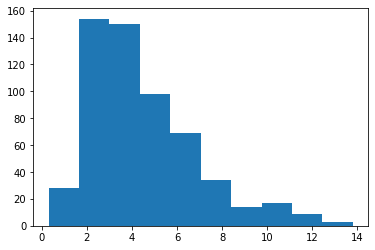

In [97]:
print(np.nanmean(ages_df.mean_age_error), np.nanmean(ages_df.Age))
plt.hist(ages_df.Age)
plt.show()

In [98]:
ages_df

,KIC,Mass,E_Mass,e_Mass,Rad,E_Rad,e_Rad,rho,E_rho,e_rho,...,E_nussini,i,e_i,E_i,P,e_P,E_P,Flag,Type,Source
0,1430163.0,1.380,0.140,0.100,1.490,0.050,0.050,0.41950,0.018900,0.018100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1435467.0,1.466,NaN,0.060,1.728,NaN,0.027,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1725815.0,1.430,0.150,0.110,2.020,0.080,0.080,0.17320,0.007700,0.007400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2010607.0,1.402,0.067,0.051,2.410,0.100,0.090,0.09973,0.009867,0.009399,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2309595.0,1.167,0.084,0.077,2.423,0.076,0.073,0.08183,0.002543,0.002494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,8494142.0,1.418,0.030,0.019,NaN,NaN,NaN,0.29800,0.005000,0.004000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,8494142.0,1.418,0.030,0.019,NaN,NaN,NaN,NaN,NaN,NaN,...,b'0.2184288103613 ',b'62.79423713265998 ',b'23.819323103741784 ',b'18.53286641900722 ',b'14.516514699214401 ',b' 4.47302960359936 ',b' 9.88500061737599 ',b'0',b'MS',b'K'
1091,3632418.0,1.408,0.021,0.030,NaN,NaN,NaN,0.28700,0.004000,0.005000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,6278762.0,0.739,0.009,0.011,NaN,NaN,NaN,2.49800,0.018000,0.025000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
ages_df.loc[ages_df.KIC==1430163.0][['Age','E_Age','e_Age','mean_age_error','Mass','E_Mass','e_Mass','Rad','E_Rad','e_Rad']]

,Age,E_Age,e_Age,mean_age_error,Mass,E_Mass,e_Mass,Rad,E_Rad,e_Rad
0,1.3,0.6,0.7,0.65,1.38,0.14,0.1,1.49,0.05,0.05


In [100]:
ages_df.loc[ages_df.KIC==8494142.0][['Age','E_Age','e_Age','mean_age_error','Mass','E_Mass','e_Mass','Rad','E_Rad','e_Rad']]

,Age,E_Age,e_Age,mean_age_error,Mass,E_Mass,e_Mass,Rad,E_Rad,e_Rad
1089,2.62,0.26,0.24,0.25,1.418,0.03,0.019,NaN,NaN,NaN
1090,2.62,0.26,0.24,0.25,1.418,0.03,0.019,NaN,NaN,NaN


In [101]:
catalog.loc[catalog.KIC==1430163][['iso_age','iso_age_err1','iso_age_err2','iso_mass','iso_mass_err1',
                                   'iso_mass_err2','iso_rad','iso_rad_err1','iso_rad_err2']]

,iso_age,iso_age_err1,iso_age_err2,iso_mass,iso_mass_err1,iso_mass_err2,iso_rad,iso_rad_err1,iso_rad_err2
105,1.64,0.57,-0.63,1.316,0.061,-0.049,1.472,0.033,-0.03


In [102]:
catalog.loc[catalog.KIC==8494142][['iso_age','iso_age_err1','iso_age_err2','iso_mass','iso_mass_err1',
                                   'iso_mass_err2','iso_rad','iso_rad_err1','iso_rad_err2']]

,iso_age,iso_age_err1,iso_age_err2,iso_mass,iso_mass_err1,iso_mass_err2,iso_rad,iso_rad_err1,iso_rad_err2
38542,2.14,0.42,-0.43,1.401,0.065,-0.061,1.832,0.045,-0.044


In [103]:
print(np.nanmean(catalog.iso_age_err1), np.nanmean(catalog.iso_age_err2))

1.869161620658949 -1.736218462451766


In [104]:
print(np.nanmean(ages_df.mean_age_error))

0.7911619791666666


In [105]:
print(chaplin.loc[chaplin.KIC==1430163])
print(serenelli.loc[serenelli.KIC==1430163])
print(creevey.loc[creevey.KIC==1430163])
print(aguirre.loc[aguirre.KIC==1430163])
print(hall.loc[hall.KIC==1430163])


       KIC  Mass  E_Mass  e_Mass   Rad  E_Rad  e_Rad     rho   E_rho   e_rho  \
0  1430163  1.38    0.14     0.1  1.49   0.05   0.05  0.4195  0.0189  0.0181   

   log(g)  E_log(g)  e_log(g)  Age  E_Age  e_Age  mean_age_error  
0   4.234     0.014     0.015  1.3    0.6    0.7            0.65  
Empty DataFrame
Columns: [KIC, Teff, e_Teff, [M/H], e_[M/H], Rad, E_Rad, e_Rad, s_Rad, Mass, E_Mass, e_Mass, s_Mass, logg, E_logg, e_logg, s_logg, rho, E_rho, e_rho, s_rho, Age, E_Age, e_Age, s_Age, loggnp.nanmean(0.5*(df.E_Age + df.e_Age)), mean_age_error]
Index: []

[0 rows x 27 columns]
Empty DataFrame
Columns: [Name, KIC, Rad, e_Rad, Mass, e_Mass, Age, e_Age, Lum, e_Lum, Teff, e_Teff, logg, e_logg, [M/H], e_[M/H], Plx, e_Plx, Vrot, e_Vrot, AMPrad, AMPmass, AMPage, AMPZini, AMPYini, AMPmlp, AMPXc/Xi, AMPa0, Chi2Nr01, Chi2Nr02, Chi2Nsp, Teffsp, e_Teffsp, [M/H]sp, e_[M/H]sp, Ksmag, e_Ksmag, AKs, e_AKs, Prot, e_Prot, r_Teffsp, r_Prot, mean_age_error]
Index: []

[0 rows x 44 columns]
Empty DataFra

In [106]:
print(chaplin.loc[chaplin.KIC==8494142])
print(serenelli.loc[serenelli.KIC==8494142])
print(creevey.loc[creevey.KIC==8494142])
print(aguirre.loc[aguirre.KIC==8494142])
print(hall.loc[hall.KIC==8494142])


Empty DataFrame
Columns: [KIC, Mass, E_Mass, e_Mass, Rad, E_Rad, e_Rad, rho, E_rho, e_rho, log(g), E_log(g), e_log(g), Age, E_Age, e_Age, mean_age_error]
Index: []
Empty DataFrame
Columns: [KIC, Teff, e_Teff, [M/H], e_[M/H], Rad, E_Rad, e_Rad, s_Rad, Mass, E_Mass, e_Mass, s_Mass, logg, E_logg, e_logg, s_logg, rho, E_rho, e_rho, s_rho, Age, E_Age, e_Age, s_Age, loggnp.nanmean(0.5*(df.E_Age + df.e_Age)), mean_age_error]
Index: []

[0 rows x 27 columns]
Empty DataFrame
Columns: [Name, KIC, Rad, e_Rad, Mass, e_Mass, Age, e_Age, Lum, e_Lum, Teff, e_Teff, logg, e_logg, [M/H], e_[M/H], Plx, e_Plx, Vrot, e_Vrot, AMPrad, AMPmass, AMPage, AMPZini, AMPYini, AMPmlp, AMPXc/Xi, AMPa0, Chi2Nr01, Chi2Nr02, Chi2Nsp, Teffsp, e_Teffsp, [M/H]sp, e_[M/H]sp, Ksmag, e_Ksmag, AKs, e_AKs, Prot, e_Prot, r_Teffsp, r_Prot, mean_age_error]
Index: []

[0 rows x 44 columns]
        KOI      KIC  Teff  e_Teff    [Fe/H] e_[Fe/H]   Mass  E_Mass  e_Mass  \
27  b' 370'  8494142  6144  b'106'  b' 0.13'  b'0.10'  1.418    

### Gyro-kinematic ages, from Lu et al. 2021: https://iopscience.iop.org/article/10.3847/1538-3881/abe4d6#ajabe4d6t1

    kepid    Prot  e_Prot              GaiaDR2    RAdeg  e_RAdeg   DEdeg  \
0  892713   5.753   0.777  2050232256840088832  291.140    0.017  36.623   
1  892834  13.765   0.023  2050232089348169728  291.163    0.019  36.628   
2  893033  26.999   0.214  2050232639104044032  291.208    0.020  36.668   
3  893165  54.874   3.786  2050231505232662528  291.237    0.011  36.615   
4  893286  28.211   0.872  2050237758705104896  291.264    0.022  36.668   

   e_DEdeg   allvz  e_allvz  veldis  kinage  e_kinage     Ro      Teff  \
0    0.022 -12.292    0.790  14.556   4.132     1.776  0.522  6308.396   
1    0.024   2.592    3.274   6.762   1.235     1.738  0.673  4881.242   
2    0.024 -41.087    3.357  18.404   5.979     1.790  1.388  4689.995   
3    0.015   5.218    3.285  13.730   3.769     1.772  2.517  5933.169   
4    0.026   8.977    3.306  18.748   6.156     1.791  1.529  5320.302   

   absGmag  e_veldis  
0    1.487     0.006  
1    6.251     0.011  
2    6.653     0.004  
3    3

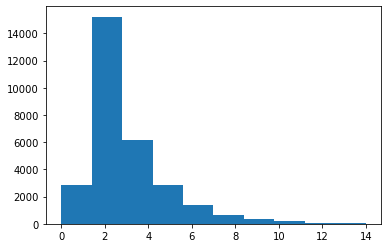

In [107]:
gyro = pd.read_csv(path+'gyrokinematic_ages.txt', skiprows=43, sep='\s+', header=0,
           names=['kepid','Prot','e_Prot','GaiaDR2','RAdeg','e_RAdeg','DEdeg','e_DEdeg','allvz','e_allvz','veldis','kinage','e_kinage','Ro',
                 'Teff','absGmag','e_veldis'])
print(gyro.head())
print(np.nanmean(gyro.e_kinage), np.nanmedian(gyro.e_kinage))

plt.hist(gyro.loc[gyro.kinage < 14].kinage)
plt.show()

In [108]:
gyro = gyro.loc[(gyro.Teff < 6200) & (gyro.Teff > 5000)]
gyro

,kepid,Prot,e_Prot,GaiaDR2,RAdeg,e_RAdeg,DEdeg,e_DEdeg,allvz,e_allvz,veldis,kinage,e_kinage,Ro,Teff,absGmag,e_veldis
3,893165,54.874,3.786,2050231505232662528,291.237,0.011,36.615,0.015,5.218,3.285,13.730,3.769,1.772,2.517,5933.169,3.695,0.001
4,893286,28.211,0.872,2050237758705104896,291.264,0.022,36.668,0.026,8.977,3.306,18.748,6.156,1.791,1.529,5320.302,5.496,0.007
5,893383,21.598,0.536,2050237380747973888,291.285,0.015,36.634,0.018,-16.289,3.295,9.319,2.047,1.753,1.159,5664.012,5.097,0.013
6,893507,11.075,0.053,2050190548423108864,291.313,0.019,36.633,0.025,-10.619,3.298,21.208,7.475,1.798,0.609,5432.080,2.386,0.001
7,893559,14.878,0.108,2050237930503862016,291.323,0.027,36.687,0.033,11.182,3.276,9.324,2.049,1.753,0.828,5135.328,5.735,0.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29924,12784578,21.888,0.143,2139293974299332864,290.060,0.016,52.006,0.018,-13.705,0.441,9.028,1.947,1.751,1.352,5199.907,5.269,0.007
29938,12884566,23.740,0.450,2139310844931172096,289.790,0.022,52.285,0.032,8.788,5.529,10.907,2.623,1.760,1.467,5536.989,5.145,0.008
29944,12934525,25.101,0.240,2139334621870146048,289.884,0.023,52.337,0.027,2.167,5.304,11.894,3.006,1.765,1.546,5282.823,5.577,0.007
29945,12934557,31.226,0.729,2139336305497339904,289.905,0.018,52.395,0.019,-5.855,5.360,17.224,5.387,1.786,1.813,5674.284,2.756,0.003


1.7480000000000002 1.7719999999999998
0.46 2.04
-0.39 -1.84
12600
576
67380


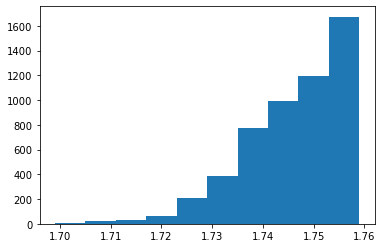

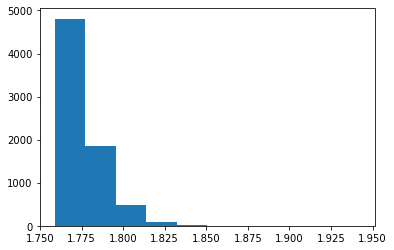

In [109]:
thresh = 2.5
print(np.nanmedian(gyro.loc[gyro.kinage < thresh].e_kinage), np.nanmedian(gyro.loc[gyro.kinage > thresh].e_kinage))
print(np.nanmedian(catalog.loc[catalog.iso_age < thresh].iso_age_err1), np.nanmedian(catalog.loc[catalog.iso_age > thresh].iso_age_err1))
print(np.nanmedian(catalog.loc[catalog.iso_age < thresh].iso_age_err2), np.nanmedian(catalog.loc[catalog.iso_age > thresh].iso_age_err2))
print(len(gyro))
print(len(ages_df))
print(len(catalog))

plt.hist(gyro.loc[gyro.kinage < thresh].e_kinage)
plt.show()

plt.hist(gyro.loc[gyro.kinage > thresh].e_kinage)
plt.show()

Looks like gyrokinematic ages are better estimates for stars older than ~2.5 Gyrs. Is it even possible to incorporate this homogeneously into the simulations? At least for the asteroseismic ages, I can use them for all age ranges, although I'd only have 576 stars...

I want to see if I am able to say that the small sample of asteroseismic stars makes no difference when I swap with corresponding isochrone stars

According to Jamie, these are actual gyro ages (no kinematics): https://iopscience.iop.org/article/10.3847/1538-4357/ab5c24

Also, apparently Ruth Angus's stardate does gyro for stars with rotation periods and switches to isochrones if it can't do it: https://github.com/RuthAngus/stardate

#### What's the temp and age distribution of asteroseismic vs isochrone vs gyrochronology stars?

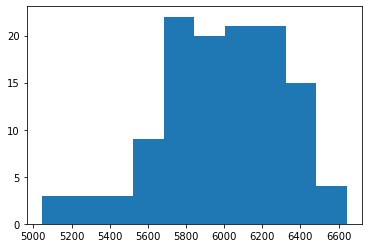

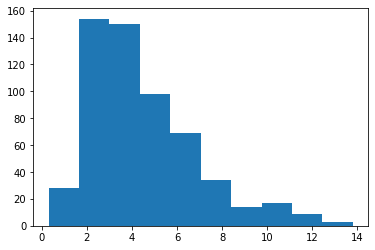

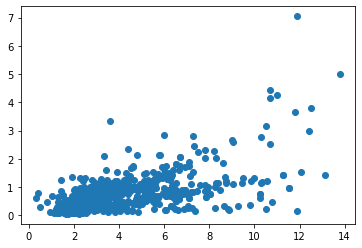

In [135]:
plt.hist(ages_df.Teff.dropna())
plt.show()

plt.hist(ages_df.Age.dropna())
plt.show()

plt.scatter(ages_df.Age, ages_df.mean_age_error)
plt.show()

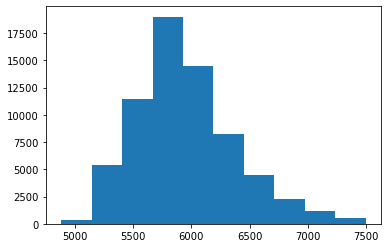

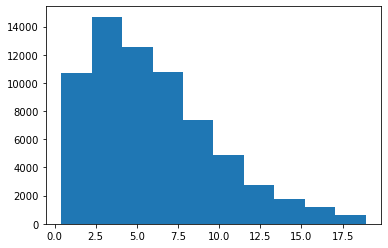

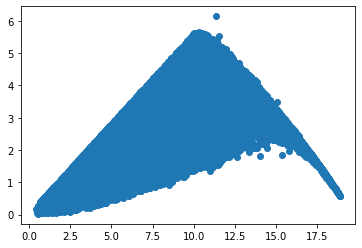

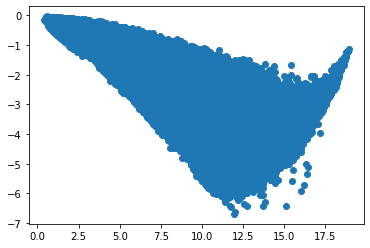

In [138]:
plt.hist(catalog.iso_teff)
plt.show()

plt.hist(catalog.iso_age)
plt.show()

plt.scatter(catalog.iso_age, catalog.iso_age_err1)
plt.show()

plt.scatter(catalog.iso_age, catalog.iso_age_err2)
plt.show()

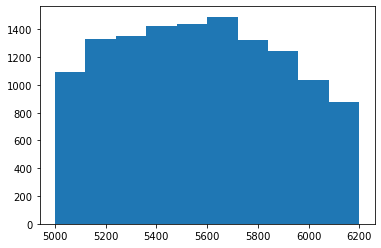

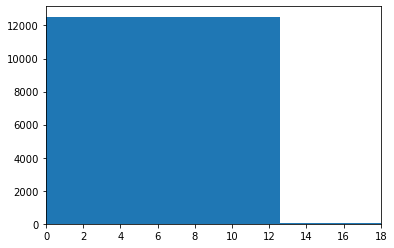

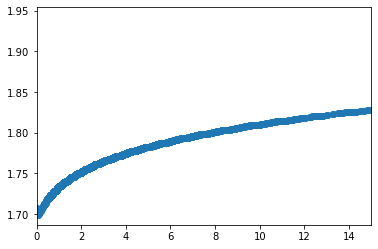

In [143]:
plt.hist(gyro.Teff)
plt.show()

plt.hist(gyro.kinage)
plt.xlim([0, 18])
plt.show()

plt.scatter(gyro.kinage, gyro.e_kinage)
plt.xlim([0, 15])
plt.show()

In [122]:
filename = path+'asteroseismology_data/gyro/J_ApJ_888_43_table3.dat.fits' 
# table 4: Stellar fundamental parameters based on the SDSS Teff scale
# table 5: Stellar fundamental parameters based on the APOGEE Stellar Parameters and Chemical Abundances pipeline (ASPCAP) Teff scale
# table 4 is better
hdul = fits.open(filename)
hdul.info()

data = fits.getdata(filename,header=True,ext=1)
df = pd.DataFrame(np.array(data[0])) # to avoid big-endian/little-endian mixup: https://stackoverflow.com/questions/30283836/creating-pandas-dataframe-from-numpy-array-leads-to-strange-errors
print(df.head())

Filename: /Users/chrislam/Desktop/sculpting/asteroseismology_data/gyro/J_ApJ_888_43_table3.dat.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     125   ()      
  1  table3.dat    1 TableHDU       175   483R x 26C   [I8, A16, I4, I3, F6.3, F5.3, F6.3, F5.3, A10, F4.2, F4.2, A10, F5.2, F5.2, F6.3, F5.3, F6.3, F5.2, F4.2, F4.2, F4.2, F4.2, F4.2, F4.2, F4.2, F4.2]   
           KIC                2MASS     Teff  e_Teff      [M/H]   e_[M/H]  \
0  b' 1432745'  b'19255715+3704231'  b'4601'  b' 99'  b' 0.171'  b'0.118'   
1  b' 1724975'  b'19290115+3715011'  b'5259'  b'108'  b'-0.011'  b'0.117'   
2  b' 1996721'  b'19060115+3728027'  b'5020'  b'101'  b'-0.005'  b'0.115'   
3  b' 2018047'  b'19285561+3728053'  b'4049'  b'103'  b'-0.375'  b'0.116'   
4  b' 2156061'  b'19215838+3732382'  b'4284'  b' 96'  b' 0.146'  b'0.117'   

       [a/H]   e_[a/H]           Spec   log(g)  ...      E_Lum       Age  \
0  b'-0.024'  b'0.102'  b'ASPCAP_cal'  b'4

In [145]:
df.KIC = df.KIC.apply(convert_int)
#df.KIC = df.KIC.str.decode("utf-8").astype("str")
df.Mass = df.Mass.apply(convert_float)
df.E_Mass = df.E_Mass.apply(convert_float)
df.e_Mass = df.e_Mass.apply(convert_float)
#df['loggnp.nanmean(0.5*(df.E_Age + df.e_Age))'] = df['logg'].apply(convert_float)
#df['E_logg'] = df['E_logg'].apply(convert_float)
#df['e_logg'] = df['e_logg'].apply(convert_float)
df.Age = df.Age.apply(convert_float)
df.E_Age = df.E_Age.apply(convert_float)
df.e_Age = df.e_Age.apply(convert_float)
df.Teff = df.Teff.apply(convert_int)
df.Rad = df.Rad.apply(convert_float)
df.E_Rad = df.E_Rad.apply(convert_float)
df.e_Rad = df.e_Rad.apply(convert_float)



In [217]:
actual_gyro = df
actual_gyro['mean_age_error'] = 0.5*(actual_gyro.e_Age+actual_gyro.E_Age)
print(np.nanmedian(actual_gyro['mean_age_error']))

0.49


Even better than asteroseismology!

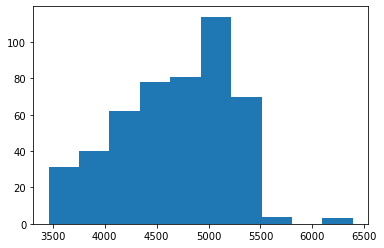

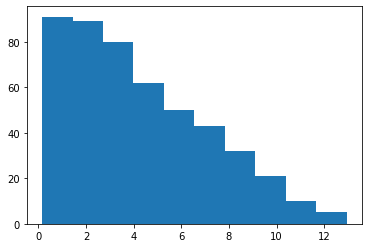

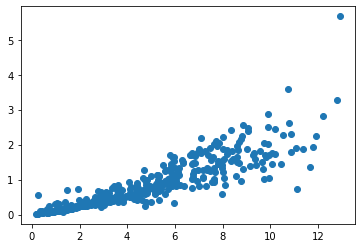

In [130]:
plt.hist(actual_gyro.Teff)
plt.show()

plt.hist(actual_gyro.Age)
plt.show()

plt.scatter(actual_gyro.Age, actual_gyro.mean_age_error)
plt.show()

### Ok, but how do these new ages affect our results? 

#### Gyrochronology

In [169]:
actual_gyro

,KIC,2MASS,Teff,e_Teff,[M/H],e_[M/H],[a/H],e_[a/H],Spec,log(g),...,Age,e_Age,E_Age,Mass,e_Mass,E_Mass,Rad,e_Rad,E_Rad,mean_age_error
0,1432745,b'19255715+3704231',4601,b' 99',b' 0.171',b'0.118',b'-0.024',b'0.102',b'ASPCAP_cal',b'4.45',...,2.88,0.35,0.38,0.77,0.03,0.03,0.71,0.02,0.02,0.365
1,1724975,b'19290115+3715011',5259,b'108',b'-0.011',b'0.117',b'-0.042',b'0.101',b'ASPCAP_cal',b'4.20',...,1.03,0.10,0.11,0.89,0.03,0.03,0.80,0.03,0.03,0.105
2,1996721,b'19060115+3728027',5020,b'101',b'-0.005',b'0.115',b' 0.012',b'0.101',b'ASPCAP_cal',b'4.44',...,6.04,0.97,1.12,0.81,0.03,0.03,0.77,0.03,0.03,1.045
3,2018047,b'19285561+3728053',4049,b'103',b'-0.375',b'0.116',b' 0.103',b'0.103',b'ASPCAP_cal',b'4.33',...,8.79,0.89,1.02,0.55,0.03,0.03,0.54,0.03,0.03,0.955
4,2156061,b'19215838+3732382',4284,b' 96',b' 0.146',b'0.117',b'-0.047',b'0.103',b'ASPCAP_cal',b'4.31',...,4.45,0.72,0.81,0.70,0.03,0.03,0.66,0.02,0.02,0.765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,12166913,b'19414029+5047283',4547,b' 95',b' 0.091',b'0.115',b'-0.045',b'0.102',b'ASPCAP_cal',b'4.28',...,1.01,0.10,0.13,0.75,0.03,0.02,0.69,0.02,0.02,0.115
479,12167086,b'19415596+5047455',4765,b'112',b'-0.023',b'0.121',b' 0.019',b'0.103',b'ASPCAP_cal',b'4.32',...,9.41,1.41,1.44,0.75,0.03,0.03,0.73,0.03,0.03,1.425
480,12268054,b'19453779+5055298',4209,b' 86',b' 0.082',b'0.112',b'-0.045',b'0.102',b'ASPCAP_cal',b'4.39',...,1.51,0.16,0.19,0.67,0.03,0.02,0.63,0.02,0.02,0.175
481,12314646,b'19412234+5104273',3692,b'100',b' 0.023',b'0.100',b'-0.003',b'0.100',b'ASPCAP_raw',b'4.37',...,0.72,0.14,0.35,0.52,0.04,0.06,0.49,0.03,0.05,0.245


In [218]:
# keep only FGK stars
actual_gyro = actual_gyro.loc[(actual_gyro.Teff <= 7500) & (actual_gyro.Teff >= 3700)]
print(len(actual_gyro))

459


In [219]:
actual_gyro['fractional_err1'] = actual_gyro.E_Age/actual_gyro.Age
actual_gyro['fractional_err2'] = actual_gyro.e_Age/actual_gyro.Age

# remove giants
actual_gyro['logR'] = np.log10(actual_gyro.Rad)
actual_gyro['is_giant'] = np.where(actual_gyro['logR'] >= 0.00035*(actual_gyro['Teff'] - 4500) + 0.15, True, False)
actual_gyro = actual_gyro.loc[actual_gyro.is_giant==False]
actual_gyro

/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_777/3997165187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_gyro['fractional_err1'] = actual_gyro.E_Age/actual_gyro.Age
/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_777/3997165187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual_gyro['fractional_err2'] = actual_gyro.e_Age/actual_gyro.Age
/var/folders/h2/sp_lfvz5515bhg_y92psw7f80000gn/T/ipykernel_777/3997165187.py:5: SettingWithCopyWarning: 
A value is trying to 

,KIC,2MASS,Teff,e_Teff,[M/H],e_[M/H],[a/H],e_[a/H],Spec,log(g),...,e_Mass,E_Mass,Rad,e_Rad,E_Rad,mean_age_error,fractional_err1,fractional_err2,logR,is_giant
0,1432745,b'19255715+3704231',4601,b' 99',b' 0.171',b'0.118',b'-0.024',b'0.102',b'ASPCAP_cal',b'4.45',...,0.03,0.03,0.71,0.02,0.02,0.365,0.131944,0.121528,-0.148742,False
1,1724975,b'19290115+3715011',5259,b'108',b'-0.011',b'0.117',b'-0.042',b'0.101',b'ASPCAP_cal',b'4.20',...,0.03,0.03,0.80,0.03,0.03,0.105,0.106796,0.097087,-0.096910,False
2,1996721,b'19060115+3728027',5020,b'101',b'-0.005',b'0.115',b' 0.012',b'0.101',b'ASPCAP_cal',b'4.44',...,0.03,0.03,0.77,0.03,0.03,1.045,0.185430,0.160596,-0.113509,False
3,2018047,b'19285561+3728053',4049,b'103',b'-0.375',b'0.116',b' 0.103',b'0.103',b'ASPCAP_cal',b'4.33',...,0.03,0.03,0.54,0.03,0.03,0.955,0.116041,0.101251,-0.267606,False
4,2156061,b'19215838+3732382',4284,b' 96',b' 0.146',b'0.117',b'-0.047',b'0.103',b'ASPCAP_cal',b'4.31',...,0.03,0.03,0.66,0.02,0.02,0.765,0.182022,0.161798,-0.180456,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,12066749,b'19363799+5031122',4585,b' 98',b' 0.026',b'0.116',b'-0.039',b'0.102',b'ASPCAP_cal',b'4.33',...,0.03,0.03,0.69,0.03,0.02,0.360,0.124567,0.124567,-0.161151,False
478,12166913,b'19414029+5047283',4547,b' 95',b' 0.091',b'0.115',b'-0.045',b'0.102',b'ASPCAP_cal',b'4.28',...,0.03,0.02,0.69,0.02,0.02,0.115,0.128713,0.099010,-0.161151,False
479,12167086,b'19415596+5047455',4765,b'112',b'-0.023',b'0.121',b' 0.019',b'0.103',b'ASPCAP_cal',b'4.32',...,0.03,0.03,0.73,0.03,0.03,1.425,0.153029,0.149841,-0.136677,False
480,12268054,b'19453779+5055298',4209,b' 86',b' 0.082',b'0.112',b'-0.045',b'0.102',b'ASPCAP_cal',b'4.39',...,0.03,0.02,0.63,0.02,0.02,0.175,0.125828,0.105960,-0.200659,False


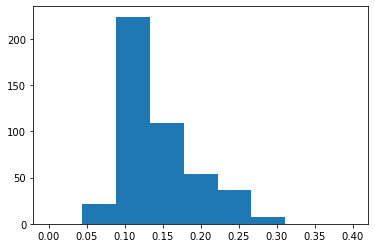

In [220]:
plt.hist(actual_gyro.fractional_err2, bins=np.linspace(0,0.4,10))
plt.show()

# let's get rid of anything higher than 0.2 then

In [221]:
# remove fractional age errors greater than 0.58
print(np.median(actual_gyro.E_Age), np.median(actual_gyro.e_Age), np.median(catalog.iso_age_err1), np.median(catalog.iso_age_err2),
     np.median(actual_gyro.fractional_err1), np.median(actual_gyro.fractional_err2))

actual_gyro = actual_gyro.loc[(actual_gyro.fractional_err1 <= 0.56)&(actual_gyro.fractional_err2 <= 0.56)] # 0.2
print(len(actual_gyro))

0.49 0.46 1.76 -1.45 0.14083910086363366 0.1293610547667343
451


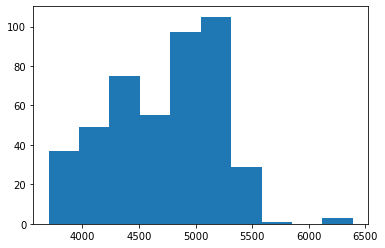

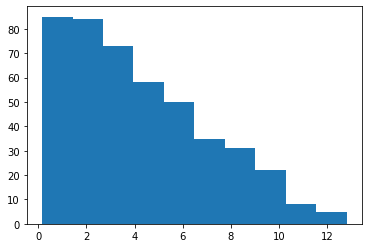

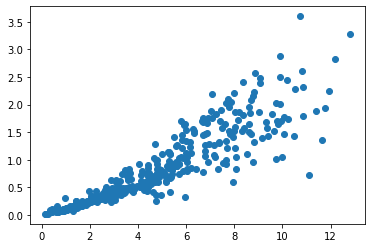

In [222]:
# new distributions for surviving gyrochronology stars
plt.hist(actual_gyro.Teff)
plt.show()

plt.hist(actual_gyro.Age)
plt.show()

plt.scatter(actual_gyro.Age, actual_gyro.mean_age_error)
plt.show()

Crossmatch time

In [177]:
# source: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative
kois = pd.read_csv(path+'crossmatch_fun/cumulative_2021.03.04_20.04.43.csv')
kois = kois.loc[kois.koi_disposition != 'FALSE POSITIVE']
print(kois)
print(list(kois.columns))

         kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
0     10797460  K00752.01  Kepler-227 b       CONFIRMED        CANDIDATE   
1     10797460  K00752.02  Kepler-227 c       CONFIRMED        CANDIDATE   
2     10811496  K00753.01           NaN       CANDIDATE        CANDIDATE   
4     10854555  K00755.01  Kepler-664 b       CONFIRMED        CANDIDATE   
5     10872983  K00756.01  Kepler-228 d       CONFIRMED        CANDIDATE   
...        ...        ...           ...             ...              ...   
9538   9938836  K07978.01           NaN       CANDIDATE        CANDIDATE   
9542  10011213  K07982.01           NaN       CANDIDATE        CANDIDATE   
9552  10028127  K08193.01           NaN       CANDIDATE        CANDIDATE   
9560  10128825  K07986.01           NaN       CANDIDATE        CANDIDATE   
9562  10155286  K07988.01           NaN       CANDIDATE        CANDIDATE   

      koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
0       

In [223]:
positives_kepler = pd.merge(kois, actual_gyro, how='inner', left_on='kepid', right_on='KIC') 
print(len(kois))
print(len(positives_kepler))
print(positives_kepler.head())
print(positives_kepler.columns)

4724
14
     kepid kepoi_name      kepler_name koi_disposition koi_pdisposition  \
0  7295235  K00987.01   Kepler-743 A b       CONFIRMED        CANDIDATE   
1  8242434  K01726.01     Kepler-942 b       CONFIRMED        CANDIDATE   
2  9006186  K02169.01  Kepler-1130 A b       CONFIRMED        CANDIDATE   
3  9006186  K02169.02              NaN       CANDIDATE        CANDIDATE   
4  9006186  K02169.03              NaN       CANDIDATE        CANDIDATE   

   koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...  \
0      1.000              0              0              0              0  ...   
1      0.748              0              0              0              0  ...   
2      0.897              0              0              0              0  ...   
3      0.961              0              0              0              0  ...   
4      0.649              0              0              0              0  ...   

   e_Mass  E_Mass   Rad  e_Rad  E_Rad  mean_age_error 

In [182]:
kepler_stellar = pd.read_csv(path+'crossmatch_fun/kepler_stellar_17.csv')
print(len(kepler_stellar))
print(kepler_stellar.head())

200038
    kepid           tm_designation  teff  teff_err1  teff_err2   logg  \
0  757076  2MASS J19240929+3635532  5160      171.0     -156.0  3.580   
1  757099  2MASS J19241033+3635377  5519      182.0     -149.0  3.822   
2  757137  2MASS J19241341+3633358  4706       74.0     -102.0  2.374   
3  757280  2MASS J19242289+3633538  6543      162.0     -194.0  4.082   
4  757450  2MASS J19243302+3634385  5332      106.0      -96.0  4.500   

   logg_err1  logg_err2   feh  feh_err1  ...  timeout06p0  timeout07p5  \
0      0.928     -0.232 -0.10      0.30  ...          0.0          0.0   
1      0.638     -0.213 -0.22      0.35  ...          1.0          1.0   
2      0.030     -0.027 -0.10      0.20  ...          1.0          1.0   
3      0.258     -0.172 -0.24      0.25  ...          0.0          0.0   
4      0.050     -0.036 -0.08      0.15  ...          0.0          0.0   

   timeout09p0  timeout10p5  timeout12p0  timeout12p5  timeout15p0  \
0          0.0          0.0          0.

In [224]:
kepler_stellar_enriched = pd.merge(kepler_stellar, actual_gyro, how='inner', left_on='kepid', right_on='KIC')
print(len(kepler_stellar_enriched))

451


In [225]:
kepler_planet_enriched = pd.merge(kepler_stellar, positives_kepler, how='inner', left_on='kepid', right_on='kepid')
print(len(kepler_planet_enriched))

14


In [226]:
kepler_planet_enriched

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,e_Mass,E_Mass,Rad,e_Rad,E_Rad,mean_age_error,fractional_err1,fractional_err2,logR,is_giant
0,3109550,2MASS J19184121+3817523,5513,169.0,-127.0,4.179,0.260,-0.140,0.07,0.25,...,0.04,0.04,0.89,0.05,0.06,0.415,0.078505,0.076636,-0.050610,False
1,3129238,2MASS J19371284+3812108,5341,143.0,-159.0,4.526,0.099,-0.121,-0.50,0.35,...,0.04,0.04,0.83,0.04,0.04,0.065,0.125000,0.107143,-0.080922,False
2,3865815,2MASS J19412431+3855373,5307,190.0,-111.0,4.014,0.397,-0.132,0.12,0.25,...,0.04,0.04,0.88,0.04,0.05,0.840,0.243094,0.220994,-0.055517,False
3,6063220,2MASS J19492496+4118001,4783,95.0,-95.0,4.602,0.014,-0.046,0.18,0.15,...,0.03,0.03,0.78,0.03,0.03,0.760,0.160083,0.155925,-0.107905,False
4,6071903,2MASS J19571668+4123047,5313,106.0,-106.0,4.571,0.015,-0.085,0.12,0.15,...,0.04,0.04,0.84,0.04,0.05,0.325,0.149780,0.136564,-0.075721,False
5,7295235,2MASS J19421779+4248231,5511,98.0,-120.0,4.554,0.018,-0.102,0.10,0.15,...,0.04,0.04,0.89,0.05,0.06,0.280,0.099010,0.085809,-0.050610,False
6,7335514,2MASS J18430644+4255283,4524,81.0,-72.0,4.576,0.042,-0.012,0.12,0.15,...,0.03,0.03,0.71,0.02,0.02,0.130,0.089041,0.089041,-0.148742,False
7,8242434,2MASS J19394922+4408593,4827,96.0,-96.0,4.615,0.012,-0.054,0.14,0.15,...,0.03,0.03,0.75,0.03,0.03,1.645,0.222076,0.210250,-0.124939,False
8,9006186,2MASS J19004979+4523036,5450,108.0,-108.0,4.563,0.017,-0.094,0.10,0.15,...,0.04,0.04,0.89,0.04,0.05,0.630,0.146727,0.137698,-0.050610,False
9,9006186,2MASS J19004979+4523036,5450,108.0,-108.0,4.563,0.017,-0.094,0.10,0.15,...,0.04,0.04,0.89,0.04,0.05,0.630,0.146727,0.137698,-0.050610,False


In [227]:
# compute k
print(kepler_planet_enriched.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count())
#print(len(catalog)-833-134-38-15-5)

           kepid
koi_count       
1             10
4              1


In [228]:
kepler_planet_enriched.loc[kepler_planet_enriched.kepid==9006186]

,kepid,tm_designation,teff,teff_err1,teff_err2,logg,logg_err1,logg_err2,feh,feh_err1,...,e_Mass,E_Mass,Rad,e_Rad,E_Rad,mean_age_error,fractional_err1,fractional_err2,logR,is_giant
8,9006186,2MASS J19004979+4523036,5450,108.0,-108.0,4.563,0.017,-0.094,0.1,0.15,...,0.04,0.04,0.89,0.04,0.05,0.63,0.146727,0.137698,-0.05061,False
9,9006186,2MASS J19004979+4523036,5450,108.0,-108.0,4.563,0.017,-0.094,0.1,0.15,...,0.04,0.04,0.89,0.04,0.05,0.63,0.146727,0.137698,-0.05061,False
10,9006186,2MASS J19004979+4523036,5450,108.0,-108.0,4.563,0.017,-0.094,0.1,0.15,...,0.04,0.04,0.89,0.04,0.05,0.63,0.146727,0.137698,-0.05061,False
11,9006186,2MASS J19004979+4523036,5450,108.0,-108.0,4.563,0.017,-0.094,0.1,0.15,...,0.04,0.04,0.89,0.04,0.05,0.63,0.146727,0.137698,-0.05061,False


...I can't really do anything with that

#### Asteroseismology stars

In [229]:
# keep only FGK stars
ages_df = ages_df.loc[(ages_df.Teff <= 7500) & (ages_df.Teff >= 3700)]
print(len(ages_df))

185


In [230]:
ages_df['fractional_err'] = ages_df.mean_age_error/ages_df.Age

# remove giants
ages_df['logR'] = np.log10(ages_df.Rad)
ages_df['is_giant'] = np.where(ages_df['logR'] >= 0.00035*(ages_df['Teff'] - 4500) + 0.15, True, False)
ages_df = ages_df.loc[ages_df.is_giant==False]
ages_df.head()

,KIC,Mass,E_Mass,e_Mass,Rad,E_Rad,e_Rad,rho,E_rho,e_rho,...,E_i,P,e_P,E_P,Flag,Type,Source,fractional_err,logR,is_giant
0,NaN,1.001,NaN,0.019,1.001,NaN,0.005,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025114,0.000434,False
1,1435467.0,1.466,NaN,0.060,1.728,NaN,0.027,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043147,0.237544,False
2,2837475.0,1.460,NaN,0.062,1.629,NaN,0.027,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073826,0.211921,False
3,3427720.0,1.034,NaN,0.015,1.089,NaN,0.009,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048523,0.037028,False
4,3656476.0,1.101,NaN,0.025,1.322,NaN,0.007,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023086,0.121231,False


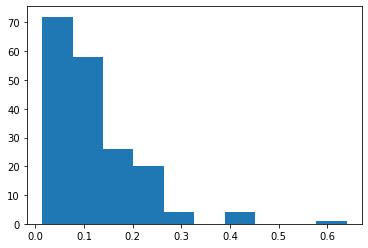

In [231]:
plt.hist(ages_df.fractional_err)
plt.show()

# let's call it at < 0.1 fractional age error

In [232]:
# remove fractional age errors greater than 0.56
print(np.median(ages_df.fractional_err))
ages_df = ages_df.loc[(ages_df.fractional_err <= 0.56)] # 0.1
print(len(ages_df)) 

0.09339975093399752
184


Crossmatch time

In [233]:
positives_kepler_astero = pd.merge(kois, ages_df, how='inner', left_on='kepid', right_on='KIC') 
positives_kepler_astero = positives_kepler_astero.dropna(subset=['P'])
print(len(kois))
print(len(positives_kepler_astero))
print(positives_kepler_astero.head())
print(positives_kepler_astero.columns)

4724
54
       kepid kepoi_name   kepler_name koi_disposition koi_pdisposition  \
1   10666592  K00002.01    Kepler-2 b       CONFIRMED        CANDIDATE   
3    5094751  K00123.01  Kepler-109 b       CONFIRMED        CANDIDATE   
5    5094751  K00123.02  Kepler-109 c       CONFIRMED        CANDIDATE   
7    8349582  K00122.01   Kepler-95 b       CONFIRMED        CANDIDATE   
10   9414417  K00974.01           NaN       CANDIDATE        CANDIDATE   

    koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  \
1       1.000              0              1              0              0   
3       1.000              0              0              0              0   
5       1.000              0              0              0              0   
7       1.000              0              0              0              0   
10      0.999              0              0              0              0   

    ...                     E_i                       P  \
1   ...  b'27.20527563939

In [234]:
kepler_stellar_enriched_astero = pd.merge(kepler_stellar, ages_df, how='inner', left_on='kepid', right_on='KIC')
print(len(kepler_stellar_enriched_astero))

183


In [235]:
kepler_planet_enriched_astero = pd.merge(kepler_stellar, positives_kepler_astero, how='inner', left_on='kepid', right_on='kepid')
print(len(kepler_planet_enriched_astero))

54


In [236]:
# compute k
print(kepler_planet_enriched_astero.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count())
#print(len(catalog)-833-134-38-15-5)

           kepid
koi_count       
1             17
2             10
3              4
5              1


In [251]:
kepler_planet_enriched_astero.loc[kepler_planet_enriched_astero.kepid==6278762].koi_period

17    4.545870
18    6.189440
19    7.743478
20    9.740485
21    3.600117
Name: koi_period, dtype: float64

In [252]:
kepler_planet_enriched_astero.loc[kepler_planet_enriched_astero.kepid==6521045].koi_period

22     6.887071
23    35.333193
24    12.815904
Name: koi_period, dtype: float64

In [254]:
kepler_planet_enriched_astero.loc[kepler_planet_enriched_astero.kepid==3544595]

,kepid,tm_designation,teff,teff_err1,teff_err2,logg_x,logg_err1,logg_err2,feh,feh_err1,...,E_i,P,e_P,E_P,Flag,Type,Source,fractional_err,logR,is_giant
1,3544595,2MASS J19254039+3840204,5648,76.0,-76.0,4.472,0.03,-0.03,-0.2,0.15,...,b'15.593488787917206 ',b'26.062736077575696 ',b' 4.70906378305633 ',b' 3.87399424030691 ',b'0',b'MS',b'K',0.089744,NaN,False


In [304]:
# use native radii
def unify_radius(curr_row: pd.Series):
    if np.isnan(curr_row['Rad'])==False:
        return curr_row['Rad']
    elif np.isnan(curr_row['Radius'])==False:
        return curr_row['Radius']
    elif np.isnan(curr_row['st_radius'])==False:
        return curr_row['st_radius']

kepler_stellar_enriched_astero['radius'] = kepler_stellar_enriched_astero.apply(func=unify_radius, axis=1)

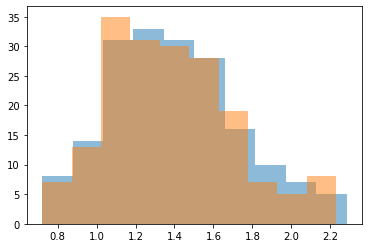

In [307]:
plt.hist(kepler_stellar_enriched_astero['radius'], alpha=0.5)
plt.hist(kepler_stellar_enriched_astero['st_radius'], alpha=0.5)
plt.show()

In [308]:
# output enriched asteroseismic star cross-matches
kepler_stellar_enriched_astero.to_csv('/Users/chrislam/Desktop/sculpting/asteroseismic_stars_fgk.csv', index=False)
# output planet multiplicity
kepler_planet_enriched_astero.to_csv('/Users/chrislam/Desktop/sculpting/asteroseismic_planets_fgk.csv', index=False)

#### Gyro-kinematic stars

In [258]:
# keep only FGK stars
gyro = gyro.loc[(gyro.Teff <= 7500) & (gyro.Teff >= 3700)]
print(len(gyro))

12600


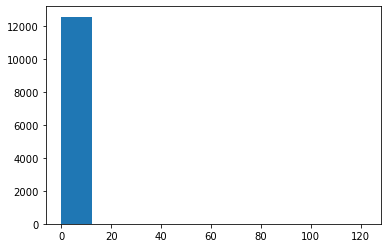

0.6344976593446164
5137


In [265]:
gyro['fractional_err'] = gyro.e_kinage/gyro.kinage

# giants were already removed, per Lu et al

plt.hist(gyro.fractional_err)
plt.show()

# remove fractional age errors greater than 0.56
print(np.median(gyro.fractional_err))
gyro = gyro.loc[(gyro.fractional_err <= 0.56)] # 0.1
print(len(gyro)) 

Crossmatch time

In [271]:
positives_kepler_gyrokin = pd.merge(kois, gyro, how='inner', on='kepid') 
print(len(kois))
print(len(positives_kepler_gyrokin))
print(positives_kepler_gyrokin.head())
print(positives_kepler_gyrokin.columns)

4724
16
     kepid kepoi_name kepler_name koi_disposition koi_pdisposition  koi_score  \
0  4471313  K05066.01         NaN       CANDIDATE        CANDIDATE        NaN   
1  4478142  K05067.01         NaN       CANDIDATE        CANDIDATE      0.898   
2  6939913  K05337.01         NaN       CANDIDATE        CANDIDATE        NaN   
3  8644911  K05553.01         NaN       CANDIDATE        CANDIDATE      0.994   
4  7917068  K05446.01         NaN       CANDIDATE        CANDIDATE        NaN   

   koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  ...   allvz  \
0              0              0              0              0  ...  32.755   
1              0              0              0              0  ...  -1.182   
2              0              0              0              0  ...   9.572   
3              0              0              0              0  ...   5.937   
4              0              0              0              0  ...  -4.030   

   e_allvz  veldis  kinage  e_kinage

In [273]:
kepler_stellar_enriched_gyrokin = pd.merge(kepler_stellar, gyro, how='inner', on='kepid')
print(len(kepler_stellar_enriched_gyrokin))

kepler_planet_enriched_gyrokin = pd.merge(kepler_stellar, positives_kepler_gyrokin, how='inner', on='kepid')
print(len(kepler_planet_enriched_gyrokin))

# compute k
print(kepler_planet_enriched_gyrokin.groupby('kepid').count().koi_count.reset_index().groupby('koi_count').count())
#print(len(catalog)-833-134-38-15-5)

5137
16
           kepid
koi_count       
1             16


Looks like asteroseismic stars are the only ones I can use. 